# Week 1 - A first step into quantum information <a class="tocSkip">
    (c) Ariel Guerreiro 2023

Hi there! In this notebook we shall introduce quantum information theory.

We will be introducing the basics of quantum information theory, starting with the representation of states of physical systems, both classical and quantum. We will then simulate a simple physical system (a single particle with magnetic momentum) using both classical and quantum models and analyze the resulting data using techniques from information theory. The goals of the Jupyter notebook are to provide hands-on experience with Python and relevant libraries, as well as to introduce concepts such as state vectors and  Bloch vectors.

## Imports

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Some initial insight

At the beginning of the 20th century, classical physics was the dominant paradigm for understanding physical phenomena. It was based on the belief that physical systems could be described by classical variables such as position, velocity, and energy, which could be determined precisely and simultaneously. However, as experimental techniques improved, various results were observed that challenged this classical view. For example, phenomena like black body radiation, the photoelectric effect, and the stability of atomic systems could not be explained by classical physics.

As a result, quantum mechanics was introduced as a new framework to explain these observations. It introduced principles like superposition, uncertainty, and correspondence to describe the behavior of physical systems at the microscopic level. The principle of superposition states that a quantum system can exist in multiple states at the same time, while classical systems can only be in one state. The principle of uncertainty states that the position and momentum of a quantum particle can't be determined precisely simultaneously. The principle of correspondence connects quantum and classical systems, as quantum systems tend towards classical behavior in the macroscopic limit.

Quantum mechanics has been highly successful in explaining physical systems at the microscopic level, leading to technological advancements in fields such as electronics, computing, and communication. It represents a significant departure from classical physics and continues to shape our understanding of the physical world.

**What is the difference between measuring physical quantities within the classical and quantum paradigms?**

In classical physics, physical systems have definite properties that can be precisely measured and predicted, and the observer's role is passive. In contrast, quantum mechanics shows a more intimate connection between the observer and the observed system. The act of measurement can influence the quantum system's state, known as wave function collapse. Measurements in classical physics are deterministic, meaning the same measurement on an identical system will always produce the same result. But in quantum mechanics, measurements are probabilistic, with different outcomes having different probabilities. This is due to the principle of superposition, which states that if a quantum system can exist in multiple states, it can also exist in any superposition of those states.

This difference has significant impacts on information processing and storage. In classical systems, information can be encoded in the values of classical variables, which can be retrieved by performing a measurement. The observer and their measurement don't affect the physical system being observed. In quantum systems, information can be encoded in the superposition and interference of quantum states, requiring a more complex retrieval process. The act of measurement collapses the wave function, causing the system to transition from a superposition to a definite state, altering the information content of the system.


**What is the state of a physical system?**

The state pf a  physical system is a complete description of the system at a specific moment in time, including all necessary information to predict its future behavior. In classical mechanics, the state of the physical system is described by a set of variables. In quantum mechanics, the state of the physical system is described by a complex mathematical object called a wave function or quantum state vector. 

For simple physical systems, a state can be described using a finite number of parameters. For instance, the state of a particle with magnetic momentum can be represented by a three-dimensional vector in both classical and quantum models. In the classical model, the vector describes the orientation of the magnetic moment with respect to an external magnetic field. In the quantum world, however, the vector is not associated with any measurable physical property of the particle. Rather, it serves as an abstract representation of the quantum state of a particle with spin 1/2 and enables the calculation of the probability distribution of possible measurement outcomes.

 This notebook will guide you through the process of describing states of classical and quantum systems, performing calculations with them, simulating measurement results, and analyzing these results using statistical techniques.
 First, let's introduce a simple physical model to compare the differences between classical and quantum information. Our model is a single particle with magnetic momentum, fixed in space but able to be re-oriented with an external magnetic field.


## The magnetic particle, the field and the state of the particle

Quantum information theory is the study of information processing and storage in quantum systems. To grasp this, it's essential to comprehend the fundamental idea of a quantum state, as a physical system must exist to store and process information.

The state of a physical system defines its properties and behavior, so representing it correctly is crucial to perform meaningful calculations and gain useful information. The state of a system can vary based on its physical properties, such as position, momentum, energy, etc. We describe the state of a physical system using a state vector, a mathematical object.

In classical mechanics, the state of a physical system is depicted as a point in a phase space, with each dimension in the space corresponding to a physical property of the system. In quantum mechanics, the state of a system is described by a state vector, which is a complex-valued vector in a Hilbert space. The state vector represents the wave function of the system and enables us to determine the probability amplitude for finding the system in a particular state.

We can compare the differences between classical and quantum information using a simple physical model: a single particle with magnetic momentum, fixed in space but able to be re-oriented by an external magnetic field.

In classical mechanics, the particle's state is described by continuous variables such as its orientation in space. The phase space for its orientation is typically represented by a sphere, and the state vector can be considered a point on the sphere's surface. The coordinates of the state vector specify its orientation relative to an arbitrary reference frame.

In quantum mechanics, the particle's state is described by a state vector or density matrix using complex numbers. This difference in representation results in fundamental differences in how information is processed in classical and quantum systems. For example, the state of a classical particle can change deterministically, while the state of a quantum particle can only change probabilistically. There's a representation called the Bloch sphere representation, which also uses the sphere's surface to represent the quantum state of the particle, with points on the sphere constituting all possible states of the quantum system. The variables in the Bloch sphere are related to the quantum state and can be used to predict measurement probabilities.

By simulating both models in Python, we can deepen our understanding of the concepts and techniques used in quantum information processing. Analysis of the results allows us to appreciate the unique features and benefits of quantum information processing, and build a strong foundation for further study in the field.

### The classical model

The classical model of a single particle with magnetic momentum is described by the Landau–Lifshitz equations. These equations describe the time evolution of the orientation of the magnetic moment vector $\mathbf{m}$ under the influence of a magnetic field $\mathbf{H}$. For simplicity, we assume that the magnetic field acting on the particle is aligned along the $z$ direction.

Under these assumptions, the Landau–Lifshitz equations are given by:

$$ \frac{d\mathbf{m}}{dt} = -\gamma \mathbf{m}\times \mathbf{H} - \lambda \mathbf{m}\times\left[\mathbf{m}\times\mathbf{H}\right]- \eta \left(\mathbf{m}-\mathbf{m_0}\right)$$

where $\mathbf{m}$ is the magnetic moment vector, $\mathbf{H}$ is the magnetic field, $\mathbf{m_0}$ is the equilibrium magnetic moment, $\gamma$ is the gyromagnetic ratio, $\lambda$ and $\eta$ are damping coefficients.

The solution to these equations gives us the orientation of the magnetic moment vector at each time step, which can be used to compute various physical quantities, such as the energy and magnetization of the particle. By using numerical simulations, we can obtain data which can be analyzed using basic tools of statistics to understand the behavior of the particle under different conditions.

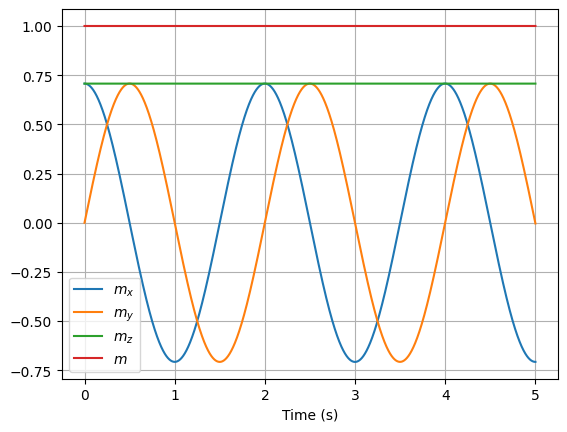

In [2]:
# Initial conditions
m_0 = np.array([1.0, 0, 1.0]) / np.sqrt(2)

# Equilibrium magnetic moment
m0 = np.array([0, 0, 1.0])

# Magnetic field
H = np.array([0, 0, 10.0])

# Relaxation times
lam = 0
eta = 0

# Gyromagnetic ratio
gamma = 0.1*np.pi

# Integration parameters
t_0 = 0
t_f = 5.0
dt = 0.0001

# Define the rhs of the system of ODEs
def ll_rhs(t, m, gamma, H, lambda_val, eta, m0):
    dm_dt = -gamma * np.cross(m, H) - lambda_val * np.cross(m, np.cross(m, H)) - eta * (m - m0)
    return dm_dt

# Solve the system of ODEs using solve_ivp with RK45 method
sol = solve_ivp(lambda t, m: ll_rhs(t, m, gamma, H, lam, eta, m0), (t_0, t_f), m_0, method='RK45', t_eval=np.arange(t_0, t_f, dt))
m = sol.y.T

# Plot the solution
plt.plot(sol.t, m[:, 0], label='$m_x$')
plt.plot(sol.t, m[:, 1], label='$m_y$')
plt.plot(sol.t, m[:, 2], label='$m_z$')
plt.plot(sol.t, np.sqrt(m[:, 0]**2 + m[:, 1]**2 + m[:, 2]**2), label='$m$')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()
plt.show()


This code uses the solve_ivp function from the scipy.integrate module to integrate the LL equations with the RK45 method. The time grid is defined using the linspace function from numpy and the magnetic field and relaxation times are defined as constants. The results are then plotted using matplotlib.

Representing the evolution of the Cartesian components of $\mathbf{m}$ over time in a simple plot can be difficult because it shows the evolution of each component independently. This makes it hard to see the relationships between the components and how they evolve together. On the other hand, the phase space plot shows all the variables in a single representation, making it easier to see how the system evolves as a whole.Furthermore, the phase space plot provides a visual representation of the constraints and symmetries in the system, which can be useful for understanding its behavior. 

Here's a code snippet to show the evolution of the state vector in phase space:

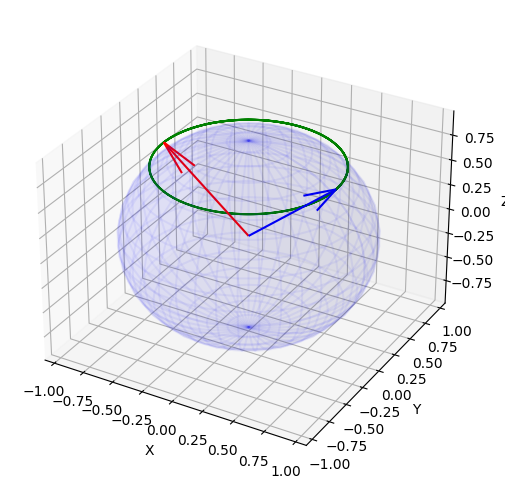

In [3]:
# define parameters
R = 0.95 # radius of sphere

# generate points for a sphere
u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
x = R*np.cos(u)*np.sin(v)
y = R*np.sin(u)*np.sin(v)
z = R*np.cos(v)

# plot the sphere
fig = plt.figure(figsize=(6, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='b', alpha=0.05)
ax.plot_wireframe(x, y, z, color='b', alpha=0.05)

mx = m[:, 0]
my = m[:, 1]
mz = m[:, 2]

# Now we can visualize the evolution of the magnetic polarization by plotting the polar and azimuthal angles over time
ax.plot(mx,my,mz, color='g')
ax.quiver(0, 0, 0,mx[0],my[0],mz[0], color='b')
ax.quiver(0, 0, 0,mx[-1],my[-1],mz[-1], color='r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# show the plot
plt.show()


### The quantum model

The Maxwell-Bloch equations describe the behavior of a two-level quantum system, such as a spin-1/2 particle in a magnetic field. The system is modeled using the density matrix, $\boldsymbol{\rho}$, which is a mathematical object that encodes information about the quantum state of the system, including the probabilities of the system being in different quantum states. The Maxwell-Bloch equations can be derived from the Schrödinger equation and can be approximated into the following set of differential equations:

\begin{align}
\frac{d\rho_{00}}{dt} &= +\Gamma \rho_{11} + \frac{i}{2}g( \rho_{01} - \rho_{10})\\
\frac{d\rho_{11}}{dt} &= -\Gamma \rho_{11} + \frac{i}{2}g( \rho_{10} - \rho_{01}) \\
\frac{d\rho_{01}}{dt} &= - \left( \frac{\Gamma}{2} + i\Delta \right) \rho_{01} + \frac{i}{2}g(\rho_{11} - \rho_{00}) \\
\frac{d\rho_{10}}{dt} &= - \left( \frac{\Gamma}{2} - i\Delta \right) \rho_{10} - \frac{i}{2}g(\rho_{11} - \rho_{00}) 
\end{align}

where $\rho_{ij}$ is an element of the density matrix, $\Gamma$ is the decay rate, $\Delta$ is the difference between the energies of the excited and ground states, and $g$ is the coupling constant between the two levels, which defines the transition rate between them driven by the magnetic field.

<div class="alert alert-block alert-info">
<b>Question 1:</b> Determine the density matrix of a general pure state for a two level system, given by:
</div>

$$
\begin{align}
\ket \psi = \cos (\theta/2) \ket 0 - i \sin(\theta/2)e^{i\phi}\ket 1
\end{align}
$$

<div class="alert alert-block alert-info">
<b>Question 2:</b> Develop a scheme by which the state of a general pure state for a two level system,    
    can be written as a complex-valued vector which works as a quantum state vector.
</div>

The solution of the Maxwell-Bloch equations can be visualized on the Bloch sphere, which is a geometrical representation of the state of a two-level quantum system. The Bloch vector, $\mathbf{b}$, is a 3-dimensional vector that represents the state of the system in terms of its probabilities of being in the two available states. It can be defined as:

\begin{align}
b_x &= 2\text{Re}(\rho_{01}) \\
b_y &= 2\text{Im}(\rho_{01}) \\
b_z &= \rho_{11} - \rho_{00}
\end{align}

The evolution equation of the Bloch vector can be found by differentiating each component of the vector and replacing the derivatives of $\rho_{ij}$ by the Maxwell-Bloch equations:
\begin{align}
\frac{db_x}{dt} &= -\frac{\Gamma}{2} b_x - \Delta b_y \\
\frac{db_y}{dt} &= -\frac{\Gamma}{2} b_y +  \Delta b_y - g b_z\\
\frac{db_z}{dt} &= -\Gamma(b_z + 1)  g b_y
\end{align}

<div class="alert alert-block alert-info">
<b>Question 3:</b> Determine the Bloch vector of a general pure state for a two level system.    
</div>

Can you provide an interpretation of the quantities $\theta$ and $\phi$?

In [4]:
def bloch_solver(b_0, Gamma, Delta, g, t_0, t_f, dt):
    # Define the rhs of the system of ODEs
    def bloch_rhs(t, b, Gamma, Delta, g):
        db_dt = np.zeros_like(b)
        db_dt[0] = -0.5 * Gamma * b[0] - Delta * b[1]
        db_dt[1] = -0.5 * Gamma * b[1] + Delta * b[0] - g * b[2]
        db_dt[2] = -Gamma * (b[2] + 1) + g * b[1]
        return db_dt# Solve the system of ODEs using solve_ivp with RK45 method
    sol = solve_ivp(lambda t, b: bloch_rhs(t, b, Gamma, Delta, g), (t_0, t_f), b_0, method='RK45', t_eval=np.arange(t_0, t_f, dt))
    return sol

#Example usage
b_0 = np.array([0.0, 1.0, 0.0])
Gamma = 3.0
Delta = 0.0
g = 0.0

t_0 = 0
t_f = 20.0
dt = 0.0001
sol = bloch_solver(b_0, Gamma, Delta, g, t_0, t_f, dt)

plot_sphere_surface(sol, R = 1.0)



NameError: name 'plot_sphere_surface' is not defined

## Measures, fluctuations and random numbers

The classical model describes the behavior of a magnetic moment vector $\mathbf{m}$ under the influence of an external magnetic field $\mathbf{H}$ and additional damping forces represented by constants $\gamma$, $\lambda$, and $\eta$. It includes phenomena  such as the precession of the magnetic moment $\mathbf{m}$ around the direction of the magnetic field $\mathbf{H}$, as well as its damping due to dissipation. Over time, the magnetic moment changes continuously and if we measure the component of the magnetic moment along the direction of the magnetic field, any value could theoretically be obtained.

In contrast, the quantum model also describes the orientation of the magnetic moment vector $\mathbf{m}$ under the influence of the external magnetic field $\mathbf{H}$, but it assumes that the alignment of the magnetic moment is quantized and can only have two possible orientations: up or down. Being a quantum system, it must also admit any superposition of these two states. However, when we measure the component of the magnetic moment along the direction of the magnetic field, we do not get the average value obtained from the superposition, but instead, the magnetic moment will be aligned either up or down, never any value in between.

It is important to stress that the Bloch vector, which is used in the quantum model, is not the actual magnetic moment vector of the particle. The Bloch vector describes the superposition of the up and down states of the magnetic moment and determines what can be expected from a measurement of the system.


[ 0.03141076  0.         -0.99950656]


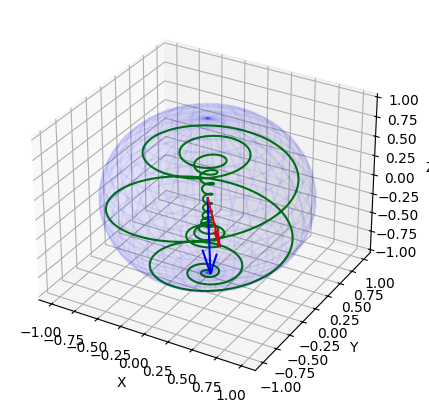

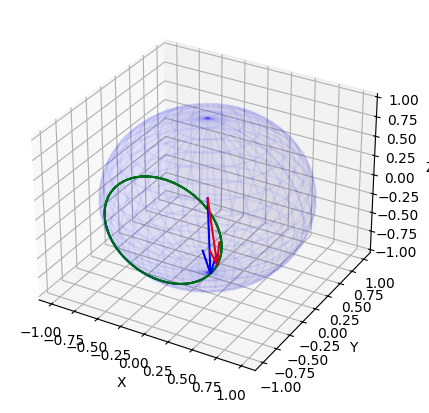

In [ ]:
#Here's a python function that converts from cartesian to spherical coordinates:
def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    phi = np.arctan2(y, x)
    return [r, theta, phi]

#And here's a python function that converts from spherical to cartesian coordinates:
def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return [x, y, z]

vector = np.array(spherical_to_cartesian(1, 0.99*np.pi, 0))
print(vector)

t_0 = 0
t_f = 20.0
dt = 0.01


# Classical model
m_0 = vector
m0 = np.array([0, 0, -1.0])
H = np.array([0, 0, 1.0])
lam = 1.0 
eta = 0.1
gamma = 5.0
sol_c = llg_solver(m_0, m0, H, lam, eta, gamma, t_0, t_f, dt)
plot_sphere_surface(sol_c, R = 1.0)

#Quantum model
b_0 = vector
Gamma = 0.0
Delta = 0.1*gamma
g = 0.4 * lam
sol_q = bloch_solver(b_0, Gamma, Delta, g, t_0, t_f, dt)
plot_sphere_surface(sol_q, R = 1.0)

To better understand the differences between the two models, we consider both the magnitudes of the magnetic moment and Bloch vectors to remain constant over time by choosing $\eta = 0$ in the classical model and $\Gamma = 0$ in the quantum model. 

Next, we create functions that emulate the results of measurements made on the system according to the classical and quantum models, which we refer to as observables. These observables provide us with a way to analyze the differences between the notion of state in classical and quantum systems. By examining the behavior of the observables over time, we can gain insight into how the models differ in their descriptions of the system and how they affect the results of measurements made on the system.

[ 0.58778525  0.         -0.80901699]


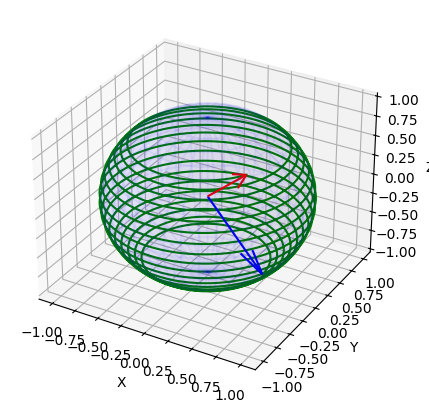

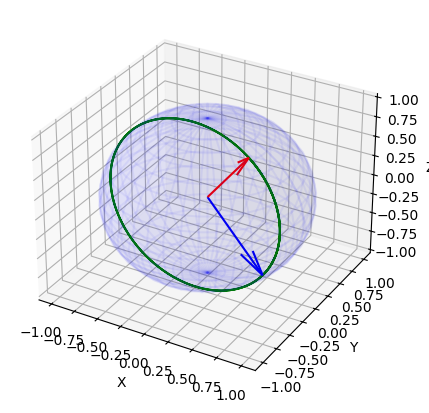

In [ ]:
vector = np.array(spherical_to_cartesian(1, 0.8 * np.pi, 0))
print(vector)

t_0 = 0
t_f = 20.0
dt = 0.01

# Classicalmodel
m_0 = vector
m0 = np.array([0, 0, -1.0])
H = np.array([0, 0, 1.0])
lam = 0.1
eta = 0.0
gamma = 5.0
sol_c = llg_solver(m_0, m0, H, lam, eta, gamma, t_0, t_f, dt)
plot_sphere_surface(sol_c, R=1.0)

#Quantum model
b_0 = vector
Gamma = 0.0
Delta = 0.1 * gamma
g = 0.5
sol_q = bloch_solver(b_0, Gamma, Delta, g, t_0, t_f, dt)
plot_sphere_surface(sol_q, R=1.0)

### The classical measurement

The classical observable is:

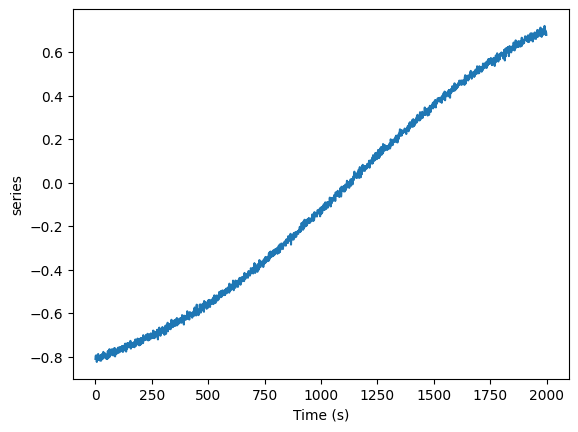

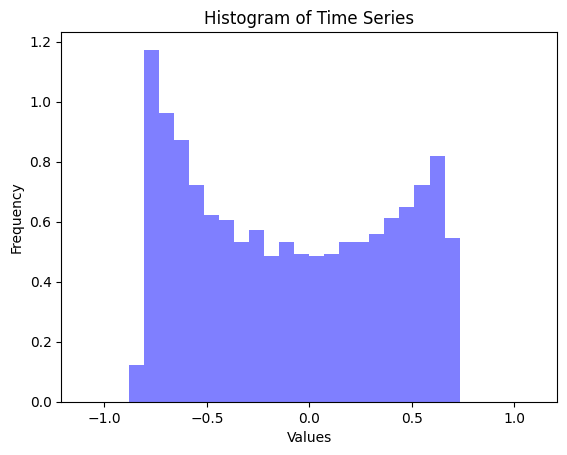

In [ ]:
def C_Observable(sol, epsilon):
    y = sol.y
    mz = y[2,:]
    x = np.random.normal(0, 1, len(mz))
    E = mz + epsilon * x
    return E


def plot_series(times, E, series_name  = "series"):
    plt.plot(times, E)
    plt.xlabel("Time (s)")
    plt.ylabel(series_name)
    plt.show()
    
def plot_histogram(time_series, x_range = None):
    if x_range:
        plt.hist(time_series, bins=30, color='blue', alpha=0.5, range = (x_range[0], x_range[1]),density=True)
    else:
        plt.hist(time_series, bins=30, color='blue', alpha=0.5,density=True)
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title("Histogram of Time Series")
    plt.show()

# Example usage
mz_c = C_Observable(sol_c, 0.01)
times = np.arange(len(mz_c))
plot_series(times, mz_c)
plot_histogram(mz_c, x_range = [-1.1,1.1])


The function C_Observable takes two arguments: sol and epsilon. sol is the output of the function solve_ivp which contains the time series of the magnetic moment vector of a particle, and epsilon is a constant that determines the measurement error.

The function first extracts the third component of the magnetic moment vector, which is stored in the variable mz. Then, it generates a random value x from a normal distribution with average 0 and standard deviation 1, and calculates $m^c_z = m_z + \epsilon \times x$. The final result is the time series corresponding to the variable E.

Note that every time the function C_Observable is called, the value of x will be different due to the random number generator.

It's important to note that the time series provided by the function C_Observable is not a sequence of actual measurements made over time, but rather a set of measurement results that would be obtained if each measurement was performed at a specific time during the evolution of the physical system. This time series is calculated by considering the third component of the magnetic moment vector at each time step, adding a random value to it, and treating this result as if it was the outcome of a measurement at that particular time. This simulation of measurement results is intended to provide an idea of what would be observed in a real-world scenario, but it's important to keep in mind that these results are not actual measurements.

### The quantum measurement

From a conceptual perspective, a quantum measurement of the z component of the magnetic moment works as follows:

1. **Preparation:** The particle is prepared in a state described by a wave function or quantum state vector, which defines the probabilities of the possible outcomes of the measurement. In our example, this corresponds to the simulation of the evolution of the Bloch vector to the pint in time when the measurement is made, say t.

2. **Interaction:** The particle interacts with a measuring device, such as a Stern-Gerlach apparatus, that can detect the z component of the magnetic moment of the particle.

3. **Collapse:** Upon interaction with the measuring device, the wave function of the particle collapses to one of the eigenstates of the observable being measured, which in this case is the z component of the magnetic moment. The eigenstates are states that have a well-defined value of the observable, so after the collapse, the wave function of the particle corresponds to one of these states. This means that after time t any subsequent measurement, at $t^\prime >t$, cannot be performed since it will give a result that differs from what would be obtained if one started the experiment from the beginning, letting the state of the particle evolve unmeasured until $t^\prime$. 

4. **Result:** The result of the measurement is the value of the z component of the magnetic moment of the particle, which is determined by the collapsed wave function. The value is one of the eigenvalues of the observable, and the probability of obtaining a particular value is given by the squared modulus of the corresponding coefficient in the wave function. We shall use a random number generator to draw lots from all possible eigenvalues, in this case either $m_z = +1$ or $m_z= -1$.

It is important to note that the collapse of the wave function during a quantum measurement is a fundamental aspect of quantum mechanics that distinguishes it from classical physics. In classical physics, a measurement of an observable does not affect the state of the system being measured, whereas in quantum mechanics, the wave function of the system collapses to a definite state upon measurement.


In [ ]:
def Q_Observable(sol, epsilon):
    y = sol.y
    bz = y[2]
    p = 0.5 * (1 - bz)
    f = (epsilon/2)**2
    
    mz = np.ones_like(bz)
    x = np.random.uniform(0, 1, len(mz))
    ind = np.where(x<p)
    mz[ind] = -1
    x = np.random.uniform(0, 1, len(mz))
    ind = np.where(x<f)
    mz[ind] = - mz[ind]
   
    return mz

Assuming that the measurement is done at $t=t_f$, the result of the experiment is obtained as:

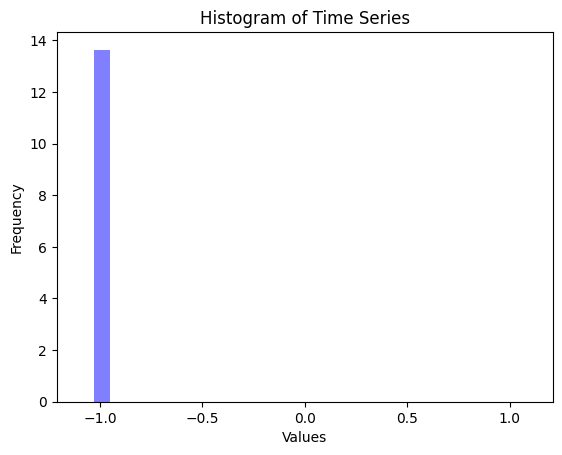

In [ ]:
# Example usage
mz_q = Q_Observable(sol_q, 0.01)
times = np.arange(len(mz_q))
#plot_series(times, mz_q)
plot_histogram(mz_q[-1],x_range = [-1.1,1.1])

Notice that if we make the measurement of the magnetic momentum of a single particle at $t_f$, we really can tell anything about the original state of the particle. From a single measurement we cannot infer any information about the Bloch vector at $t_f$. 
If we were using this physical system to store or process information stored in the component $b_z$ of the Bloch vector, we would not be able to say much with a single measure!

The alternative, is to repeat the experiment several times with different particles, all prepared in the same initial state. 

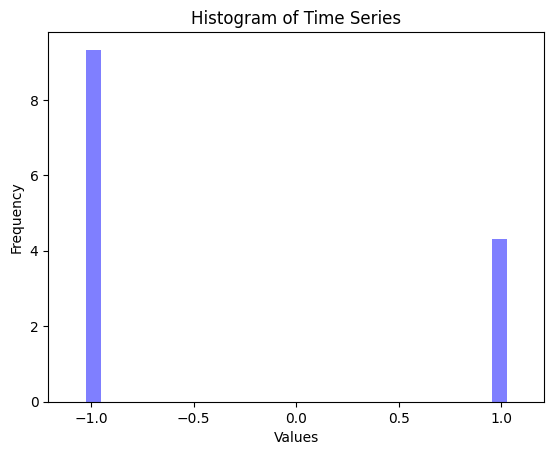

Mean value of mz: -0.368
Value of bz: -0.3201399620179526


In [ ]:
a = 0.9
n =  1000
epsilon =  0
results_q = []
for i in range(n):
    b_0 = spherical_to_cartesian(1, a*np.pi, 0)
    sol_q = bloch_solver(b_0, Gamma, Delta, g, t_0, t_f, dt)
    mz_q = Q_Observable(sol_q, epsilon)
    results_q.append(mz_q)
mz_q = Q_Observable(sol_q, 0.01)
times = np.arange(len(mz_q))

plot_histogram(results_q[-1],x_range = [-1.1,1.1])    
print("Mean value of mz:", np.mean(results_q[-1]))
print("Value of bz:",sol_q.y[2,-1] )

Interestingly, the mean value of $m_z$ over 1000 experiments is very close to the value of $b_z$. Let us see how the mean value of $m_z$ depends on the number of experiment results:

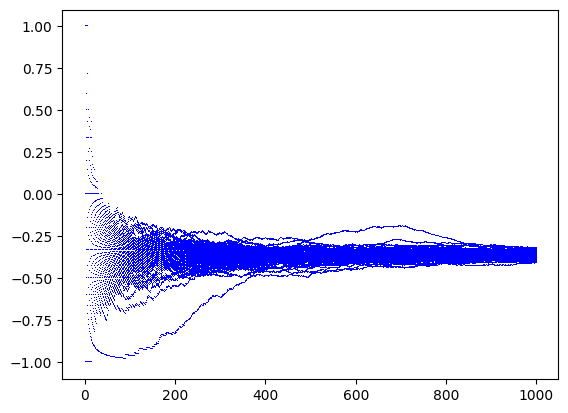

In [ ]:
measures = results_q[-1]

for j in range(100):
    data = []
    for i in np.arange(n-1)+1:
        data.append(np.mean(measures[0:i]))
    plt.plot(data, "b,")
    np.random.shuffle(measures) 
plt.show()

<div class="alert alert-block alert-info">
<b>Question 4:</b> Provide an explanation for the pattern depicted in the previous plot. What should be observed in the limit for infinite number of experiments?
</div>

In [ ]:
# value of the azimutal angle of the magnetic moment produced by the source 
a = 0.8

#number of experimentes conducted
n =  100
# measurement noise (to be explored later)
epsilon =  0

results_c = []
for i in range(n):
    m_0 = spherical_to_cartesian(1, a*np.pi, 0)
    sol_c = llg_solver(m_0, m0, H, lam, eta, gamma, t_0, t_f, dt)
    mz_c = C_Observable(sol_c, epsilon)
    results_c.append(mz_c)

This code is defining and performing an experiment to study the behavior of a spin 1/2 particle. It is assuming that the particle's magnetic moment can realign with an external magnetic field. The experiment consists of 100 trials, and for each trial, the value for the azimuthal angle of the magnetic moment produced by the source is 0.8.

After generating the azimuthal angle, it uses the spherical_to_cartesian function to convert this value into a three-dimensional Cartesian vector representation. Then it uses the llg_solver function to simulate the dynamics of the particle, and the C_Observable function to calculate the result of a measurement on the z-component of the magnetic moment.

Finally, the results are stored in the results_c list, which collects the measurement results of the z-component of the magnetic moment for all 100 trials. The epsilon value is a measurement noise parameter, which is set to zero in this code.

Notice that the variable results_c contains the time series of $m_z$ for every initial condition.

Let us get the statistics:

(2000, 1000)


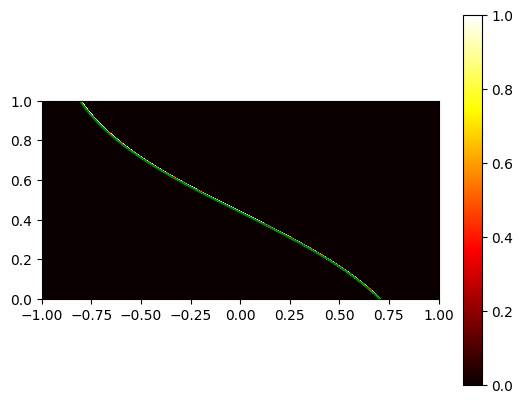

In [ ]:
def histogram_series(series, range = [-1,1], bin_size = 0.002):
    # Convert the list "series" into a 2D array
    series_array = np.array(series)
    n =  len(series_array[0,:])
    distributions = []
    means = []
    # For each slice of the 2D array "series"
    for i in np.arange(n):
        #print(series_array[:,i])
        hist, bin_edges = np.histogram(series_array[:,i], range = range, bins = np.arange(range[0], range[1] + bin_size, bin_size),density=True)
        mean = np.mean(series_array[:,i])
        distributions.append(hist)
        means.append(mean)


    return distributions, means

hc,means_c = histogram_series(results_c)
hc_array = np.array(hc)
print(hc_array.shape)

fig, ax = plt.subplots()
# Plotting the line based on the values in the means list

im = ax.imshow(hc_array, cmap='hot',extent=[-1,1, 0, 1],vmin=0, vmax=1)

# Plotting the line based on the values in the means list
times = 1-  np.arange(len(means_c))/len(means_c)
ax.plot( means_c, times, 'g-')

# Adding a colorbar to the plot
cbar = plt.colorbar(im)

# Display the plot
plt.show()

The previous plot displays the distribution of measurements taken on multiple particles over time (vertical axis). The average value across all measurements is shown as a green line.

An now, for the quantum case we get:

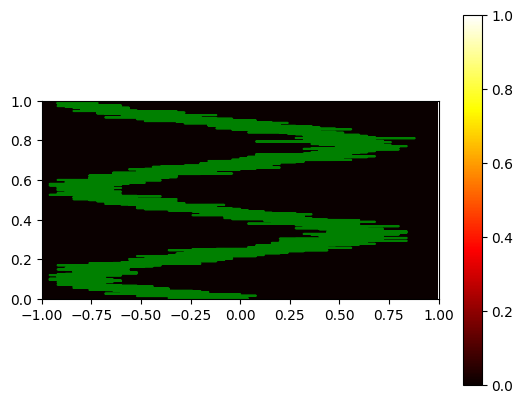

In [ ]:
a = 0.8
n =  50
epsilon =  0.0

results_q = []
for i in range(n):
    b_0 = spherical_to_cartesian(1, a*np.pi, 0)
    sol_q = bloch_solver(b_0, Gamma, Delta, g, t_0, t_f, dt)
    mz_q = Q_Observable(sol_q, epsilon)
    results_q.append(mz_q)
    
    hq,means_q = histogram_series(results_q)
hq_array = np.array(hq)
fig, ax = plt.subplots()
# Plotting the line based on the values in the means list

im = ax.imshow(hq_array, cmap='hot',extent=[-1,1, 0, 1],vmin=0, vmax=1)

# Plotting the line based on the values in the means list
times = 1-  np.arange(len(means_q))/len(means_q)
ax.plot( means_q, times, 'g-')


# Adding a colorbar to the plot
cbar = plt.colorbar(im)

# Display the plot
plt.show()

   
The previous plot displays the progression of the histogram of measurements performed on multiple particles across various experimental durations (represented on the vertical axis). The average value of the entire set of measurements is illustrated by the green line.

<div class="alert alert-block alert-info">
<b>Question 5:</b> How do you compare the classical and quantum results? Can you tell where is the probability mass in the quantum histograms? Why is the mean value of $m_z$ is oscillating (see the evolution ob $\mathbf{b_z}$ in the Bloch sphere)? What is  the interpretation of the jitter observed in the  mean value of $m_z$?
</div>


To give you some clues to solve this problem, let us run the same code but with more repetitions of the experiment.

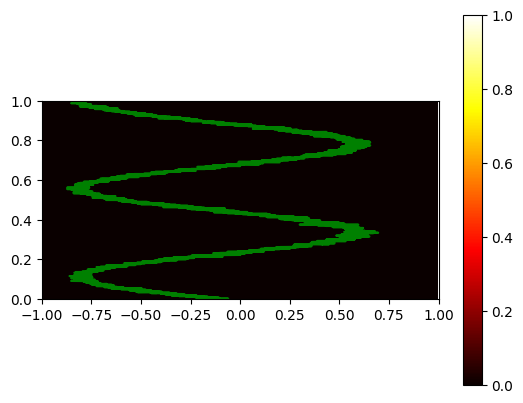

In [ ]:
a = 0.8
n =  500
epsilon =  0.0

results_q = []
for i in range(n):
    b_0 = spherical_to_cartesian(1, a*np.pi, 0)
    sol_q = bloch_solver(b_0, Gamma, Delta, g, t_0, t_f, dt)
    mz_q = Q_Observable(sol_q, epsilon)
    results_q.append(mz_q)
    
    hq,means_q = histogram_series(results_q)
hq_array = np.array(hq)
fig, ax = plt.subplots()
# Plotting the line based on the values in the means list

im = ax.imshow(hq_array, cmap='hot',extent=[-1,1, 0, 1],vmin=0, vmax=1)

# Plotting the line based on the values in the means list
times = 1-  np.arange(len(means_q))/len(means_q)
ax.plot( means_q, times, 'g-')


# Adding a colorbar to the plot
cbar = plt.colorbar(im)

# Display the plot
plt.show()

## The pure, the mixed and the entropy

So far, we've been examining the dynamics and measurements of a spin 1/2 particle's magnetic moment when it aligns with an external magnetic field. We've assumed that the initial state of the particle, whether it be classical or quantum, is perfectly known at the start of the experiment. But in reality, this is not the case.

Both classical and quantum states are usually produced within a range of possibilities and follow a distribution of frequencies. So if we repeat an experiment multiple times, we will see a variance in the results due to variability in the source. In the quantum case, this variance is added to fluctuations inherent in quantum mechanics.

From an information standpoint, if information is encoded in the physical system's state, not fully knowing that state means the information is not well defined, and the final variance in measurement results limits the quantity of the information that can be retrieved.

Let us begin by analyzing the classical case:


(10000, 1000)


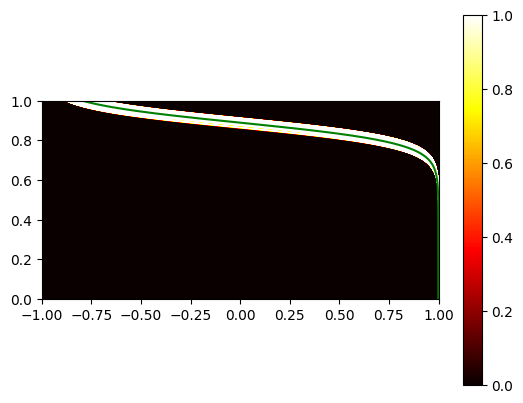

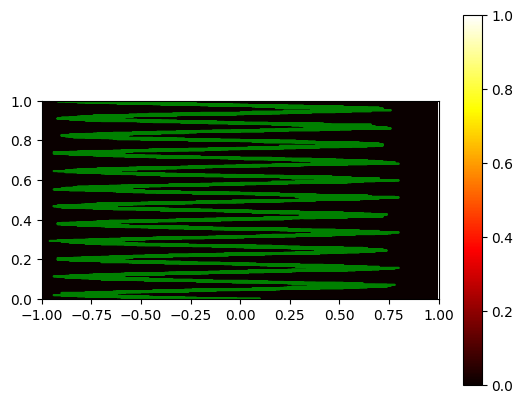

In [ ]:
t_0 = 0
t_f = 100.0
dt = 0.01

a = 0.75
b = 0.85
n =  100
epsilon =  0.0
x_c = np.random.uniform(a, b, n)
results_c = []
for i in range(n):
    m_0 = spherical_to_cartesian(1, x_c[i]*np.pi, 0)
    sol_c = llg_solver(m_0, m0, H, lam, eta, gamma, t_0, t_f, dt)
    mz_c = C_Observable(sol_c, epsilon)
    results_c.append(mz_c)
hc,means_c = histogram_series(results_c)
hc_array = np.array(hc)
print(hc_array.shape)

fig, ax = plt.subplots()
# Plotting the line based on the values in the means list

im = ax.imshow(hc_array, cmap='hot',extent=[-1,1, 0, 1],vmin=0, vmax=1)

# Plotting the line based on the values in the means list
times = 1-  np.arange(len(means_c))/len(means_c)
ax.plot( means_c, times, 'g-')

# Adding a colorbar to the plot
cbar = plt.colorbar(im)

# Display the plot
plt.show()
    
x_q = np.random.uniform(a, b, n)
results_q = []
for i in range(n):
    b_0 = spherical_to_cartesian(1, x_q[i]*np.pi, 0)
    sol_q = bloch_solver(b_0, Gamma, Delta, g, t_0, t_f, dt)
    mz_q = Q_Observable(sol_q, epsilon)
    results_q.append(mz_q)
    
hq,means_q = histogram_series(results_q)
hq_array = np.array(hq)
fig, ax = plt.subplots()
# Plotting the line based on the values in the means list

im = ax.imshow(hq_array, cmap='hot',extent=[-1,1, 0, 1],vmin=0, vmax=1)

# Plotting the line based on the values in the means list
times = 1-  np.arange(len(means_q))/len(means_q)
ax.plot( means_q, times, 'g-')


# Adding a colorbar to the plot
cbar = plt.colorbar(im)

# Display the plot
plt.show()

This code is defining and performing an experiment to study the behavior of a spin 1/2 particle. It is assuming that the particle's magnetic moment can realign with an external magnetic field. The experiment consists of 100 trials, and for each trial, it generates a random value for the azimuthal angle of the magnetic moment produced by the source. The range of these values is between 0.75 and 0.85.

After generating the azimuthal angle, it uses the spherical_to_cartesian function to convert this value into a three-dimensional Cartesian vector representation. 

<div class="alert alert-block alert-info">
<b>Question 6:</b> Does the variance of the jitter observed in the  mean value of $m_z$ increases when there is a variance in the initial state? Please justify.
</div>

Let us now try to quantify this volatility in the results of the measurements. 

Quantifying the variability in a time series can provide insights into the stability and reliability of the measurements. There are several metrics that can be used in this quantification, the more basic are:

* **Standard Deviation and Variance**: These measure the average amount by which each measurement deviates from the mean of the sample. They provides a simple, yet effective, measure of the variability of the data.

* **Coefficient of Variation (CV)**: This metric provides the ratio of the standard deviation to the mean, and it provides a standardization of the variability, which makes it easy to compare between different sets of measurements.

* **Interquartile Range (IQR)**: This metric provides the range between the first and third quartiles of the data and provides a robust measure of variability that is less sensitive to outliers.

The mathematical expressions for these quantities for a probability distribution p(x) are as follows:

* Standard Deviation:
\begin{equation}
\sigma = \sqrt{\sum_{i=1}^{n} (x_i - \mu)^2 p(x_i)}
\end{equation}
where $\mu$ is the mean of the distribution, $x_i$ is the $i^{th}$ value of the random variable $X$, and $p(x_i)$ is the probability of $x_i$.

* Variance:
\begin{equation}
\sigma^2 = \sum_{i=1}^{n} (x_i - \mu)^2 p(x_i)
\end{equation}

* Coefficient of Variation (CV):
\begin{equation}
CV = \frac{\sigma}{\mu} \times 100%
\end{equation}

* Interquartile Range (IQR):
\begin{equation}
IQR = Q_{75} - Q_{25}
\end{equation}
where $Q_{75}$ is the 75th percentile and $Q_{25}$ is the 25th percentile of the distribution.

The choice of the appropriate metric depends on the nature of the data and the desired level of detail. In general, it is recommended to use multiple metrics to get a more comprehensive understanding of the variability of the data.

In [ ]:
def variance(data):
    """Compute the variance of a histogram data.
    
    Args:
    data (array or list of arrays): input histogram data
    
    Returns:
    float or list of floats: variance of the histogram data or time series of variance values.
    """
    if isinstance(data, list):
        # time series of arrays
        return [np.var(hist) for hist in data]
    else:
        # single array
        return np.var(data)
    
def coefficient_of_variation(data):
    """Compute the Coefficient of Variation (CV) of a histogram data.
    
    Args:
    data (array or list of arrays): input histogram data
    
    Returns:
    float or list of floats: CV of the histogram data or time series of CV values.
    """
    if isinstance(data, list):
        # time series of arrays
        return [np.std(hist) / np.mean(hist) for hist in data]
    else:
        # single array
        return np.std(data) / np.mean(data)
    
def interquartile_range(data):
    """Compute the Interquartile Range (IQR) of a dataset.
    
    Args:
    data (array): input dataset
    
    Returns:
    float: the IQR of the dataset
    """
    return np.percentile(data, 75) - np.percentile(data, 25)

There are other metrics provided from information theory that can be useful in this analysis, such as Shannon entropy. Shannon entropy is a measure of the uncertainty or randomness of a random variable. In the context of the time series of measurements of $m_z$ over time, the entropy can be used to quantify the volatility or jitter in the series.

To calculate the entropy, one first needs to define a set of possible states of the time series, and assign a probability to each state based on the distribution of measurements. The entropy is then calculated as the negative sum of the probabilities of each value of the random variable, multiplied by their logarithms to the base 2.

A low entropy value indicates that the time series is more predictable and has less jitter, as the probability distribution is concentrated on a few values of the random variable. On the other hand, a high entropy value indicates that the time series is more volatile and has more jitter, as the probability distribution is spread over a larger number of values of the random variable.

Here's a python code to compute the Shannon entropy from an array containing the histogram data, and also from a time series of arrays in the form of a list:

In [ ]:
from scipy.stats import entropy

def shannon_entropy(data, base=2):
    """Compute the Shannon entropy of a histogram data.
    
    Args:
    data (array or list of arrays): input histogram data
    base (int, optional): logarithmic base for entropy calculation. Default is 2.
    
    Returns:
    float or list of floats: entropy of the histogram data or time series of entropy values.
    """
    if isinstance(data, list):
        # time series of arrays
        return [entropy(hist, base=base) for hist in data]
    else:
        # single array
        return entropy(data, base=base)

This code uses the entropy function from the scipy.stats module to compute the entropy of the histogram data. If the input is a list of arrays, the function returns a list of entropy values, one for each histogram in the time series. If the input is a single array, the function returns the entropy of that histogram. The base argument specifies the logarithmic base for entropy calculation, with a default value of 2, which corresponds to the binary entropy.

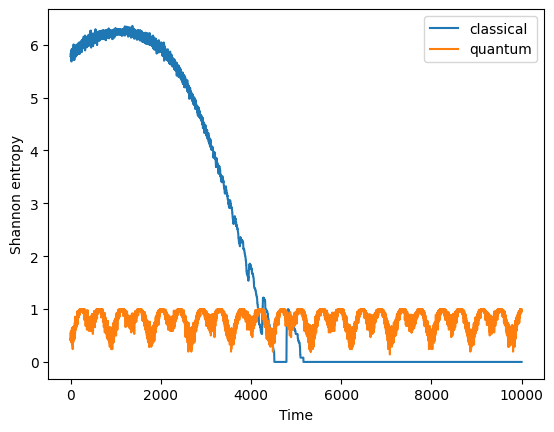

In [ ]:
#Getting the distributions normalized!
for i in range(len(hc)):
    hc[i] = hc[i]/hc[i].sum()
for i in range(len(hc)):
    hq[i] = hq[i]/hq[i].sum()

S_c = shannon_entropy(hc)
S_q = shannon_entropy(hq)
plt.plot(S_c, label='classical')
plt.plot(S_q, label='quantum')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Shannon entropy')
plt.show()

<div class="alert alert-block alert-info">
<b>Question 7:</b> You might have heard that, according to Thermodynamics, the entropy of a closed system cannot decrease over time. So, why are we obtained reductions of entropy in the previous plot? What is the catch here?
</div>

Let us now measure the entropy of the statistical distribution of physical state used to produce these measurements. We start by computing the histogram of the initial distribution of initial conditions, as each initial condition corresponds to a specific initial state.

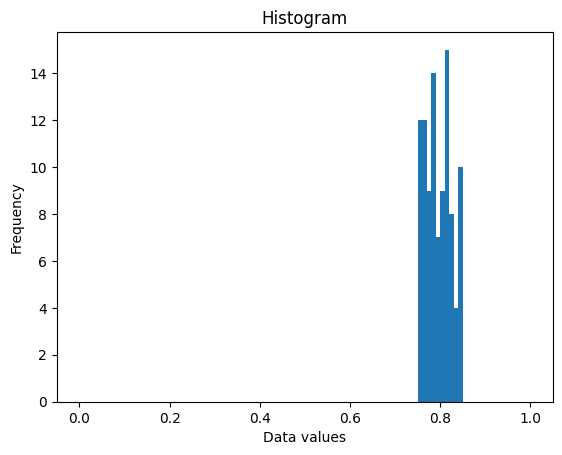

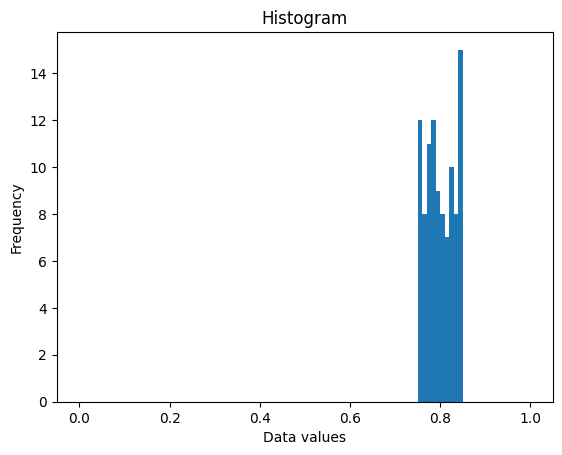

In [ ]:
def histogram(data, range=None, bins=10, density=False):
    """Compute the histogram of the data and plot it.
    
    Args:
    data (array-like): input data
    range (tuple, optional): range of the histogram. Default is None, meaning the range is automatically determined.
    bins (int or array-like, optional): number of bins or the bin edges. Default is 10.
    density (bool, optional): if True, the histogram is normalized such that the total area is equal to 1. Default is False.
    
    Returns:
    tuple: histogram data, including the bin edges and frequencies.
    """
    # Compute the histogram
    hist, bin_edges = np.histogram(data, range=range, bins=bins, density=density)
    
    # Plot the histogram

    plt.hist(data, bins=bin_edges, density=density)
    plt.xlabel('Data values')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()
    
    return hist, bin_edges

hcs, bins = histogram(x_c, range = [0,1], bins=100,density=True)
hqs, bins = histogram(x_q, range = [0,1], bins=100,density=True)

3.2451077568799205 3.2828932180476906


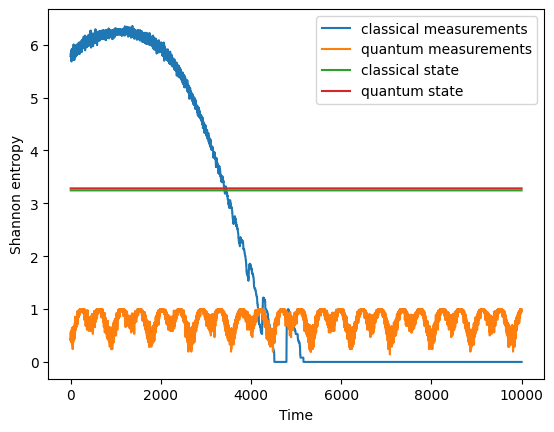

In [ ]:
hcs = hcs/hcs.sum() #because, somehow, normalization is not working!
hqs = hqs/hqs.sum()
S_cs = shannon_entropy(hcs)
S_qs = shannon_entropy(hqs)

print(S_cs,S_qs)
plt.plot(S_c, label='classical measurements')
plt.plot(S_q, label='quantum measurements')
plt.plot(S_cs*np.ones_like(S_c), label='classical state')
plt.plot(S_qs*np.ones_like(S_q), label='quantum state')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Shannon entropy')
plt.show()


The entropy of a statistical distribution of physical states is different from the entropy of the results of measurements on the same distribution.

The entropy of a distribution of physical states is a measure of the amount of uncertainty or randomness associated with the distribution. It can be calculated based on the probabilities of the different physical states in the distribution, for example using the formula for Shannon entropy.
On the other hand, the entropy of the results of measurements on a statistical distribution of physical states may contain a measure of the uncertainty or randomness associated with the measurement process. 

Sometimes, the entropy of the results of measurements on a statistical distribution of physical states may be lower than the entropy of the distribution of physical states itself, since measurement processes can introduce additional structure and reduce the amount of randomness in the results. This reduction in entropy is often referred to as measurement induced reduction in entropy.

Other metric include mutual information, cross entropy, Kullback-Leibler divergence, etc. These metrics allow you to quantify the similarity between two probability distributions, which can be useful in determining the degree of randomness or uncertainty in a set of data. For example, low entropy or low divergence between two probability distributions indicate that the two distributions are similar or deterministic, while high entropy or high divergence indicate that the two distributions are different or random. The interpretation of these metrics depends on the specific problem and the context in which they are used, but in general, they provide a measure of the amount of information contained in a set of data, which can be useful for understanding the underlying patterns and trends in the data.

## Conclusions

Today we have been working on developing a Jupyter Notebook to introduce  quantum information theory. We started by explaining the concept of state of a physical system in classical and quantum models and how to make calculations with it. A single particle with magnetic momentum was chosen as a simple physical system and was simulated in Python, starting from the classical Landau–Lifshitz–Gilbert equation and extending into the quantum Maxwell-Bloch equation. The goal was to use numerical simulations to produce data which could be analyzed using basic tools of statistics to obtain probability distributions and analyze them using techniques from information theory.

The practical goals of the Jupyter Notebook were to learn how to use Python in a Jupyter environment, use arrays with NumPy and SciPy as data containers, learn how to use ODE solvers provided by NumPy, and compute and plot different statistical quantities. The concepts introduced were probability vector, state of physical systems in classical and quantum models, state vectors, Bloch vector, difference in measurements between classical and quantum models, probability distributions associated with measurements and states of physical systems, and metrics to evaluate the variability in a probability distribution, including the notion of entropy.

<div class="alert alert-block alert-info">
<b>Question 8:</b> In your own words, provide definitions and contextualization of the following concepts:
state of a physical system in classical and quantum models; state vectors in classical and quantum models; Bloch vector; the difference in measurements between  classical and quantum models; and entropy. 
  
<b>Question 9:</b> Underlying the concepts presented in this notebook is the notion of probability distribution of a random variable, whether that variable is a physical state or the result of a measurement, say $p(x)$. In future notebooks we shall use the notion of probability vector. Discuss what you expect a probability vector to be, what properties should it have?
    
<b>Question 10:</b> A simplest example of a probability distribution is associated with a single random variable, say $p(x)$. However, there can be joint distributions of several random variables, say $p(x,y)$. In those cases what do you expect the probability vector to be? Is it a rank-1 or a rank-2 vector? Could you write it as a rank-1 vector regardless of the number of underlying random variables?
</div>

**EXERCISES:**
    
Today's exercises are just an opportunity for you to get acquainted with Jupyter Notebook, Python, and exercise your quantum intellectual muscles.

**Exercise 1:** Develop a Python code that solves a system of Ordinary Differential Equations (ODEs) in vector form as described by the following equation:

$$\frac{d}{dt}\mathbf{x} = \mathbf{M}(t, \mathbf{x}) . \mathbf{x}$$

where $\mathbf{x}$ represents the state vector and $\mathbf{M}(t, \mathbf{x})$ is the coefficient matrix that depends on both time and state. The code should be prepared to take a state vector with an arbitrary number of elements and the integration method should be at least of the same order of RK45.
    
**Exercise 2:** Determine the matrix $\mathbf{M}(t, \mathbf{x})$ for the classical and quantum models for a single particle presented in this notebook.
    
**Exercise 3:** Determine the matrix $\mathbf{M}(t, \mathbf{x})$ for the classical and quantum models for a two spin 1/2 particles. Include an interaction between the particles by allowing the applied magnetic field in each particle to be different but partially dependent on the state of the other particle, for example:

* in the classical model: 
    \begin{align}
    H_1 = H_{ext,1} + v_1 m_{z,2}\\
    H_2 = H_{ext,2} + v_2 m_{z,1}
    \end{align}
    
* in the quantum model: 
    \begin{align}
    H_1 = H_{ext,1} + v_1 b_{z,2}\\
    H_2 = H_{ext,2} + v_2 b_{z,1}
    \end{align}

**Exercise 4:** Adapt the results and codes of the previous notebook to simulate, obtain the state and measurement probability distributions and analyze them for a system of two particles described in the previous exercise. Of course the goal is to use the code developed in exercise 1.
 
**Exercise 5 (advanced):** The split step method is a numerical technique used to solve ordinary differential equations, including the vector equation 
$$\frac{d}{dt}\mathbf{x} = \mathbf{M}(t, \mathbf{x}) . \mathbf{x}.$$ 
This method is particularly useful for solving non-linear differential equations, and can be easily adapted to handle systems of equations.

The basic idea behind the split step method is to split the right-hand side of the equation into simpler parts, allowing each part to be solved separately. In the case of the vector equation 
$$\frac{d}{dt}\mathbf{x} = \mathbf{M}(t, \mathbf{x}) . \mathbf{x},$$
the matrix $\mathbf{M}(t, \mathbf{x})$ is split into two or more parts
$$\mathbf{M}(t, \mathbf{x}) = \sum_n \mathbf{M}_n(t, \mathbf{x}) $$
and each part is integrated using a suitable analytical and/or numerical integration method, such as the Euler or Runge-Kutta methods.

At each time step, the solution vector $\mathbf{x}$ is updated using the intermediate solution from each part of the matrix $\mathbf{M}(t, \mathbf{x})$. This approach leads to more accurate results compared to solving the equation in a single step.

A simple scheme to implement the split step method is to consider a times step integration of the original equation as 
$$ \mathbf{x}_{t+\Delta t} \approx exp\left[\int^{t+\Delta t}_{t} \mathbf{M}(t^{\prime}, \mathbf{x}_{t^{\prime}}) dt^{\prime} \right].\mathbf{x}_{t}$$

It should be noted that $exp$ represent the matrix exponential which should not be confused with the element-wise exponential. The exponential of a square matrix $\mathbf{A}$ is defined as:
$$e^{\mathbf{A}} = \sum_{k=0}^\infty \frac{\mathbf{A}^k}{k!}$$
which requires that the series converges, which is not always the case for all square matrices. However, for many matrices, such as diagonalizable matrices, the exponential can be efficiently computed using matrix diagonalization.

In general, $\int^{t+\Delta t}_{t} \mathbf{M}(t^{\prime}, \mathbf{x}_{t^{\prime}}) dt^{\prime}$ is very hard, even impossible, to compute analytically or numerically, so approximations are needed. One such approach is to use:
$$exp\left[\int^{t+\Delta t}_{t} \mathbf{M}(t^{\prime}, \mathbf{x}_{t^{\prime}}) dt^{\prime} \right]\approx \Pi_n exp\left[\int^{t+\Delta t}_{t} \mathbf{M_n}(t^{\prime}, \mathbf{x}_{t^{\prime}}) dt^{\prime} \right]$$
where $exp\left[\int^{t+\Delta t}_{t} \mathbf{M_n}(t^{\prime}, \mathbf{x}_{t^{\prime}}) dt^{\prime} \right]$ are easy to compute.

Develop a solver of equation 
$$\frac{d}{dt}\mathbf{x} = \mathbf{M}(t, \mathbf{x}) . \mathbf{x}$$
based on the split step method. Remember that the trick is to choose well the split of the matrix $M$ into $M_n$. You can use any library in Python and you do not need to develop the solver from scratch, just make it work!
 
**Exercise 6 (advanced):** Apply the split step method to the quantum model of a single 1/2 particle. How does it compare with the previous method in terms of the numerical quality of the solution obtained? 

In case you have not noticed, just to let you know that the split step solution could actually be casted as a sequence of quantum gates in a quantum computer. 


<div class="alert alert-success">
<b>Today's afterthoughts:</b>

Reflect on the differences between using a classical and a quantum physical system as the basis of information systems. Consider the specific challenges and difficulties associated with using quantum information systems. After reflecting on the information in this notebook, consider the question: If quantum information systems are so difficult to work with, why is technology so interested in developing them?
</div>